# Project 2: Sales Forecasting for Retail Chain

PROBLEM STATEMENT: Develop a sales forecasting model for a retail chain to predict future sales volumes based on historical data, enabling optimized inventory management and marketing strategies.

# 1. Data Generation and Collection:

Data generation and collection are fundamental processes in the field of data science and analytics, crucial for obtaining the raw material necessary for analysis, modeling, and decision-making.

In [1]:
#importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import datetime
import warnings
warnings.filterwarnings("ignore")

In [3]:
# loading the dataset
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Datasets\Project 2 Dataset.csv")
df

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags
0,05-01-2023,1,1009,Sports & Outdoor,130,No
1,05-01-2023,2,1010,Electronics,160,Yes
2,06-01-2023,1,1011,Clothing,85,No
3,06-01-2023,2,1012,Beauty & Health,60,Yes
4,07-01-2023,1,1013,Home & Kitchen,210,No
5,07-01-2023,2,1014,Toys & Games,120,Yes
6,08-01-2023,1,1015,Electronics,115,No
7,08-01-2023,2,1016,Clothing,190,Yes
8,09-01-2023,1,1017,Sports & Outdoor,140,Yes
9,09-01-2023,2,1018,Home & Kitchen,165,No


# 2. Data Preprocessing:


Data processing is the transformation of raw data into a usable format for analysis, modeling, and decision-making. It involves cleaning, transforming, and organizing data to extract meaningful insights and patterns. Key steps in data processing include data cleaning to remove errors and inconsistencies, data transformation to standardize formats and structures, and data integration to combine data from different sources. Effective data processing is essential for ensuring data quality, reliability, and suitability for analysis, ultimately leading to accurate and actionable insights.

In [4]:
#Getting the first 5 dataframes
df.head()

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags
0,05-01-2023,1,1009,Sports & Outdoor,130,No
1,05-01-2023,2,1010,Electronics,160,Yes
2,06-01-2023,1,1011,Clothing,85,No
3,06-01-2023,2,1012,Beauty & Health,60,Yes
4,07-01-2023,1,1013,Home & Kitchen,210,No


In [5]:
#Generating descriptive statistics of numerical columns
df.describe()

,Store ID,Item ID,Sales Volume
count,16.000000,16.000000,16.000000
mean,1.500000,1016.500000,136.250000
std,0.516398,4.760952,48.079795
min,1.000000,1009.000000,60.000000
25%,1.000000,1012.750000,106.250000
50%,1.500000,1016.500000,130.000000
75%,2.000000,1020.250000,168.750000
max,2.000000,1024.000000,220.000000


In [6]:
#Generating datatypes of each column
df.dtypes

Date                 object
Store ID              int64
Item ID               int64
Item Category        object
Sales Volume          int64
Promotional Flags    object
dtype: object

In [7]:
#checking the missing values
df.isnull().sum()

Date                 0
Store ID             0
Item ID              0
Item Category        0
Sales Volume         0
Promotional Flags    0
dtype: int64

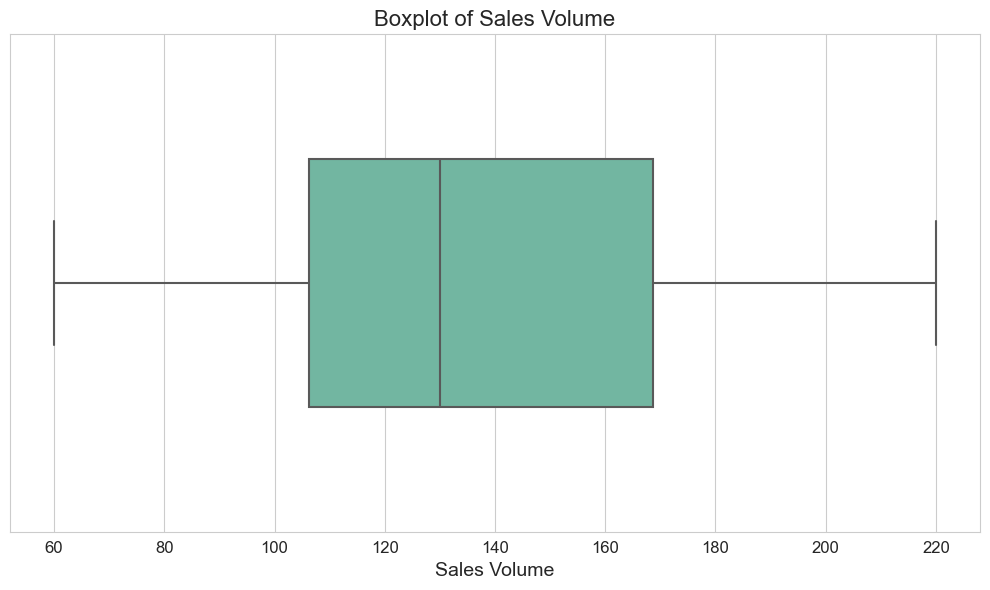

In [8]:
# Set the style of seaborn plots
sns.set_style("whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sales Volume', data=df, orient='v', width=0.5, linewidth=1.5, palette='Set2')

# Add labels and title
plt.title('Boxplot of Sales Volume', fontsize=16)
plt.xlabel('Sales Volume', fontsize=14)

# Adjust the font size of y-axis ticks
plt.xticks(fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()


In [9]:
# Calculate the IQR
Q1 = df['Sales Volume'].quantile(0.25)
Q3 = df['Sales Volume'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Replace outliers with the nearest non-outlier data point
df_no_outliers = df.copy()
df_no_outliers['Sales Volume'] = np.where(df_no_outliers['Sales Volume'] < lower_bound, df_no_outliers['Sales Volume'].quantile(0.05), df_no_outliers['Sales Volume'])
df_no_outliers['Sales Volume'] = np.where(df_no_outliers['Sales Volume'] > upper_bound, df_no_outliers['Sales Volume'].quantile(0.95), df_no_outliers['Sales Volume'])

# Identifying replaced outliers
replaced_outliers = df[(df['Sales Volume'] < lower_bound) | (df['Sales Volume'] > upper_bound)]

print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)
print('Outliers replaced with nearest non-outlier value:', replaced_outliers)


Lower bound: 12.5
Upper bound: 262.5
Outliers replaced with nearest non-outlier value: Empty DataFrame
Columns: [Date, Store ID, Item ID, Item Category, Sales Volume, Promotional Flags]
Index: []


In [10]:
# Create a copy of the DataFrame
df_no_outliers = df.copy()

# Clip the 'Sales Volume' column to the defined bounds
df_no_outliers['Sales Volume'] = df_no_outliers['Sales Volume'].clip(lower=lower_bound, upper=upper_bound)

# Find and print the removed outliers
removed_outliers = df[~df.index.isin(df_no_outliers.index)]

print('Lower bound:', lower_bound)
print('Upper bound:', upper_bound)
print('Removed outliers:', removed_outliers)
df

Lower bound: 12.5
Upper bound: 262.5
Removed outliers: Empty DataFrame
Columns: [Date, Store ID, Item ID, Item Category, Sales Volume, Promotional Flags]
Index: []


,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags
0,05-01-2023,1,1009,Sports & Outdoor,130,No
1,05-01-2023,2,1010,Electronics,160,Yes
2,06-01-2023,1,1011,Clothing,85,No
3,06-01-2023,2,1012,Beauty & Health,60,Yes
4,07-01-2023,1,1013,Home & Kitchen,210,No
5,07-01-2023,2,1014,Toys & Games,120,Yes
6,08-01-2023,1,1015,Electronics,115,No
7,08-01-2023,2,1016,Clothing,190,Yes
8,09-01-2023,1,1017,Sports & Outdoor,140,Yes
9,09-01-2023,2,1018,Home & Kitchen,165,No


In [11]:
#Top selling Categories
top_selling_categories = df.groupby('Item Category')['Sales Volume'].sum().sort_values(ascending=False).head()
print(top_selling_categories)

Item Category
Home & Kitchen      595
Electronics         455
Sports & Outdoor    400
Clothing            370
Toys & Games        230
Name: Sales Volume, dtype: int64


In [12]:
#total sales volume for both promotional and non-promotional items in the dataset.
sales_breakdown = df.groupby(['Promotional Flags'])['Sales Volume'].sum()
print(sales_breakdown)

Promotional Flags
No     1040
Yes    1140
Name: Sales Volume, dtype: int64


In [13]:
# Total and Avg sales
metrics_per_store_category = df.groupby(['Store ID', 'Item Category'])['Sales Volume'].agg(['sum', 'mean', 'max', 'min'])
print(metrics_per_store_category)

                           sum   mean  max  min
Store ID Item Category                         
1        Beauty & Health    70   70.0   70   70
         Clothing           85   85.0   85   85
         Electronics       295  147.5  180  115
         Home & Kitchen    430  215.0  220  210
         Sports & Outdoor  270  135.0  140  130
2        Beauty & Health    60   60.0   60   60
         Clothing          285  142.5  190   95
         Electronics       160  160.0  160  160
         Home & Kitchen    165  165.0  165  165
         Sports & Outdoor  130  130.0  130  130
         Toys & Games      230  115.0  120  110


In [14]:
# Convert the 'Date' column to datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [15]:
# Calculate seasonal trends in sales volume for each store
seasonal_trends = df.groupby(['Store ID', df['Date'].dt.month])['Sales Volume'].mean()
print(seasonal_trends)

Store ID  Date
1         5       130.0
          6        85.0
          7       210.0
          8       115.0
          9       140.0
          10       70.0
          11      180.0
          12      220.0
2         5       160.0
          6        60.0
          7       120.0
          8       190.0
          9       165.0
          10      110.0
          11       95.0
          12      130.0
Name: Sales Volume, dtype: float64


In [16]:
# Group the data by Store ID and Promotional Flags and calculate the mean sales volume
store_promotion_sales = df.groupby(['Store ID', 'Promotional Flags'])['Sales Volume'].mean().reset_index()
store_promotion_sales

,Store ID,Promotional Flags,Sales Volume
0,1,No,135.0
1,1,Yes,152.5
2,2,No,125.0
3,2,Yes,132.5


In [17]:
# Group the data by 'Item Category' and 'Promotional Flags' to analyze the impact of promotions on different product categories
impact_by_category = df.groupby(['Item Category', 'Promotional Flags'])['Sales Volume'].mean()
impact_by_category

Item Category     Promotional Flags
Beauty & Health   Yes                   65.0
Clothing          No                    90.0
                  Yes                  190.0
Electronics       No                   115.0
                  Yes                  170.0
Home & Kitchen    No                   187.5
                  Yes                  220.0
Sports & Outdoor  No                   130.0
                  Yes                  140.0
Toys & Games      No                   110.0
                  Yes                  120.0
Name: Sales Volume, dtype: float64

In [18]:
# Calculate the overall impact of promotions on sales volume
overall_impact = df.groupby('Promotional Flags')['Sales Volume'].mean()
overall_impact

Promotional Flags
No     130.0
Yes    142.5
Name: Sales Volume, dtype: float64

In [19]:
# grouping the data
df.groupby('Store ID')['Sales Volume'].sum()

Store ID
1    1150
2    1030
Name: Sales Volume, dtype: int64

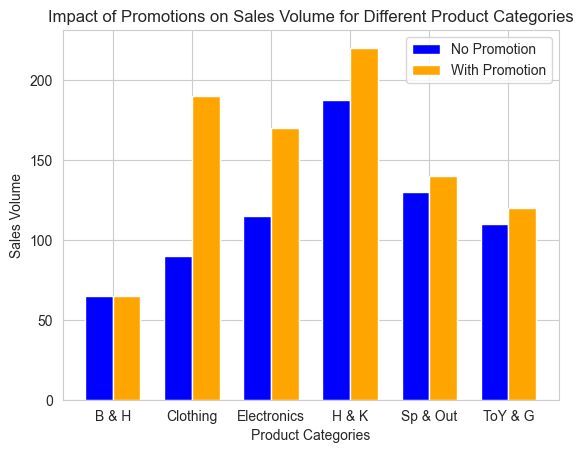

In [20]:
import matplotlib.pyplot as plt

data = {
    'B & H': [65.0, 65.0],
    'Clothing': [90.0, 190.0],
    'Electronics': [115.0, 170.0],
    'H & K': [187.5, 220.0],
    'Sp & Out': [130.0, 140.0],
    'ToY & G': [110.0, 120.0]
}

# Create a bar chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(data))
bar1 = ax.bar(index, [val[0] for val in data.values()], bar_width, label='No Promotion', color='blue')
bar2 = ax.bar([i + bar_width for i in index], [val[1] for val in data.values()], bar_width, label='With Promotion', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Product Categories')
ax.set_ylabel('Sales Volume')
ax.set_title('Impact of Promotions on Sales Volume for Different Product Categories')
ax.set_xticks([i + bar_width/2 for i in index])
ax.set_xticklabels(data.keys())
ax.legend()

plt.show()

# 3. Exploratory Data Analysis (EDA):

Exploratory Data Analysis (EDA) is the process of analyzing and visualizing data to understand its main characteristics, uncover patterns, and identify relationships between variables. It involves summarizing the main features of the dataset, examining its distribution, detecting outliers, and exploring potential trends or correlations. EDA plays a crucial role in gaining insights into the dataset before performing more advanced analyses or modeling techniques.

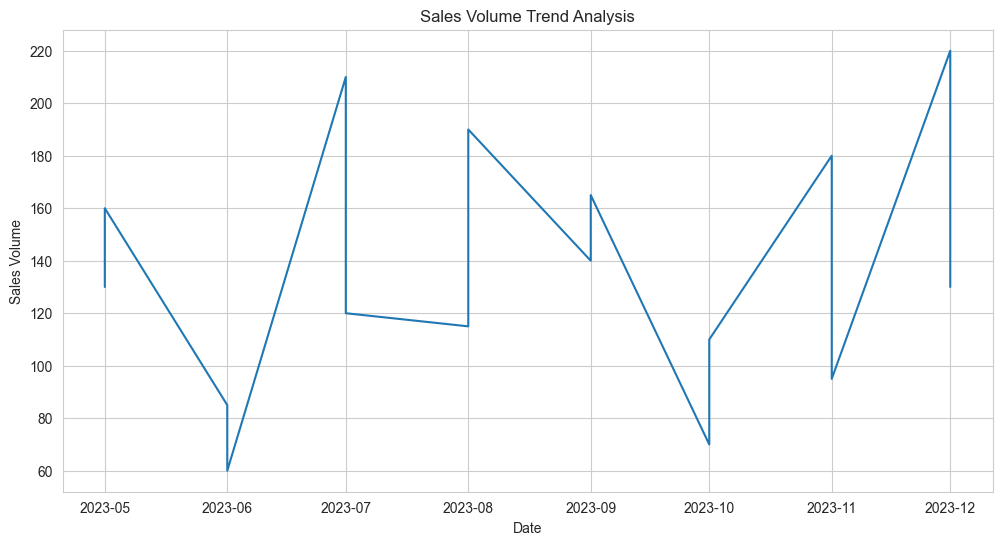

In [21]:
# Trend analysis
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Sales Volume'])
plt.title('Sales Volume Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

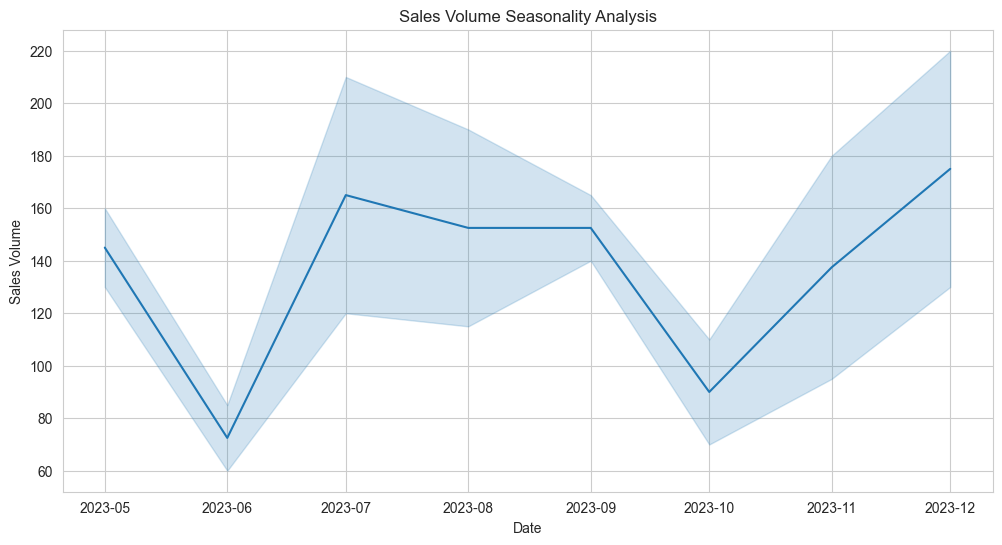

In [22]:
# Seasonality
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales Volume', data=df)
plt.title('Sales Volume Seasonality Analysis')
plt.xlabel('Date')
plt.ylabel('Sales Volume')
plt.grid(True)
plt.show()

In [23]:
#Moving Average
df['Moving Average'] = df['Sales Volume'].rolling(window=7).mean()
df

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags,Moving Average
0,2023-05-01,1,1009,Sports & Outdoor,130,No,NaN
1,2023-05-01,2,1010,Electronics,160,Yes,NaN
2,2023-06-01,1,1011,Clothing,85,No,NaN
3,2023-06-01,2,1012,Beauty & Health,60,Yes,NaN
4,2023-07-01,1,1013,Home & Kitchen,210,No,NaN
5,2023-07-01,2,1014,Toys & Games,120,Yes,NaN
6,2023-08-01,1,1015,Electronics,115,No,125.714286
7,2023-08-01,2,1016,Clothing,190,Yes,134.285714
8,2023-09-01,1,1017,Sports & Outdoor,140,Yes,131.428571
9,2023-09-01,2,1018,Home & Kitchen,165,No,142.857143


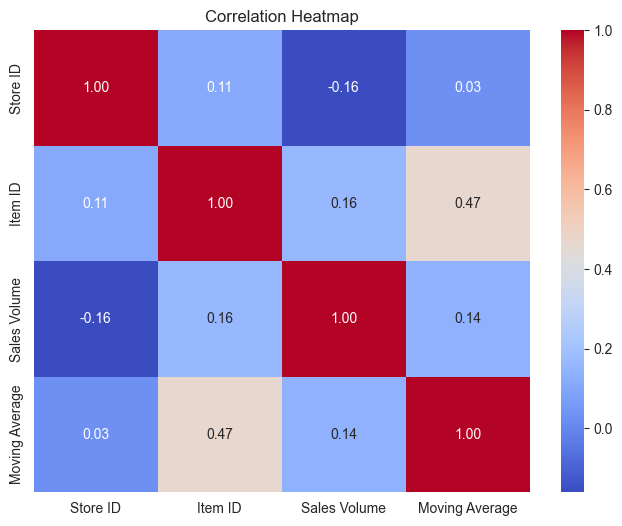

In [24]:
# Selecting only numeric columns for correlation analysis
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Computing the correlation matrix
correlation_matrix = numeric_df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


Text(0, 0.5, 'Sales Volume')

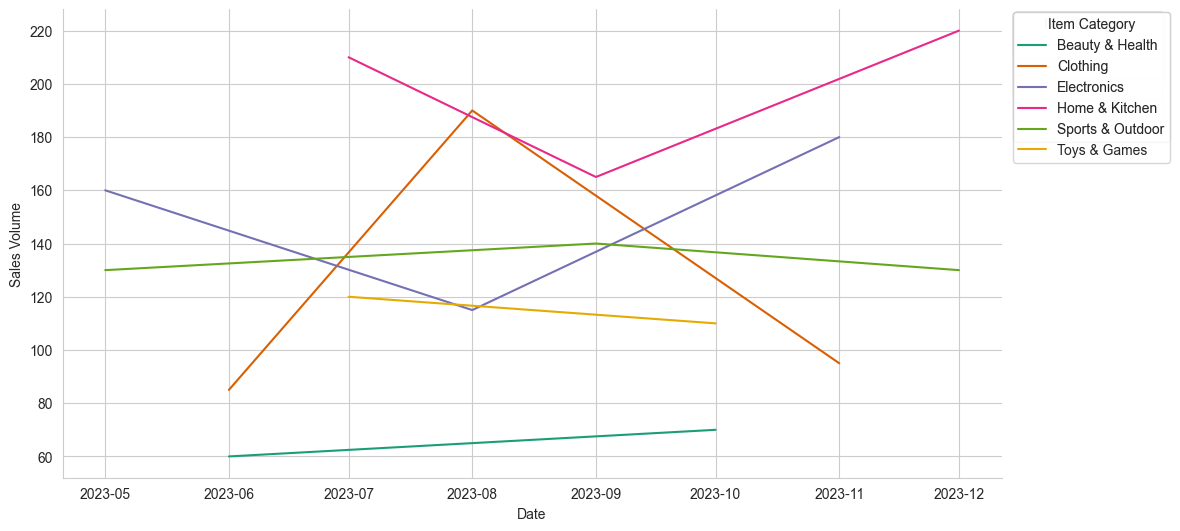

In [25]:
#  Date vs Sales Volume
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['Sales Volume']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])
fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('Date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Item Category')):
  _plot_series(series, series_name, i)
  fig.legend(title='Item Category', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
plt.ylabel('Sales Volume')

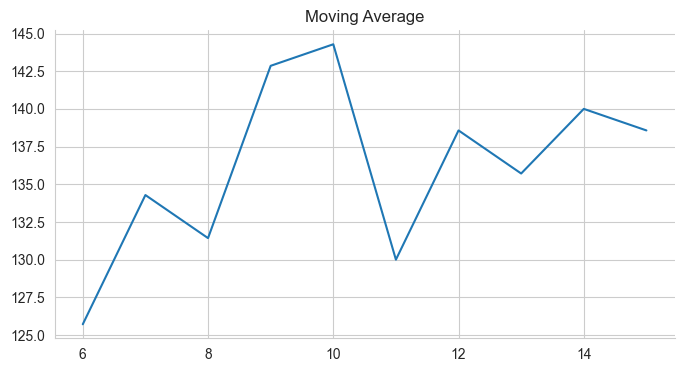

In [26]:
#  Moving Average
df['Moving Average'].plot(kind='line', figsize=(8, 4), title='Moving Average')
plt.gca().spines[['top', 'right']].set_visible(False)

<Axes: xlabel='Store ID'>

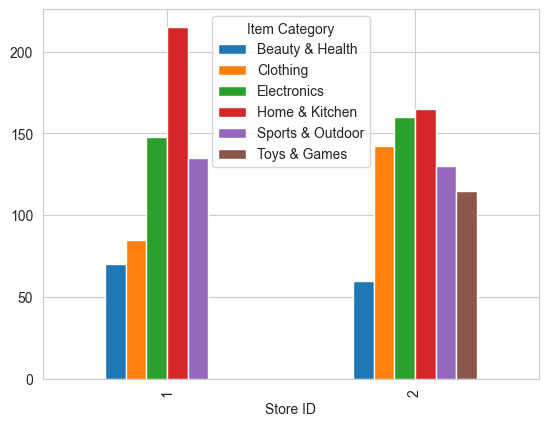

In [27]:
# Sales Volume by Item Category and Store
df.groupby(['Store ID', 'Item Category'])['Sales Volume'].mean().unstack().plot(kind='bar')

<Axes: xlabel='Date'>

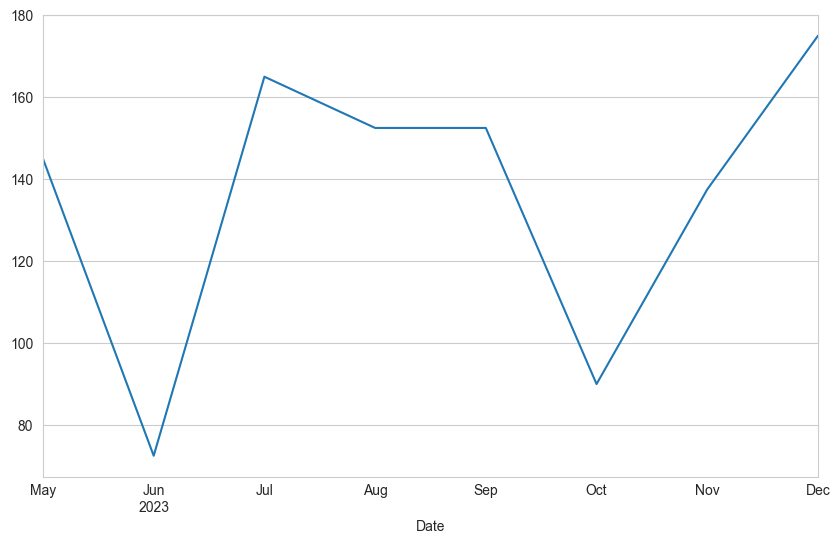

In [28]:
#  Average Sales Volume over Time
df.groupby('Date')['Sales Volume'].mean().plot(figsize=(10, 6))

<Axes: xlabel='Date'>

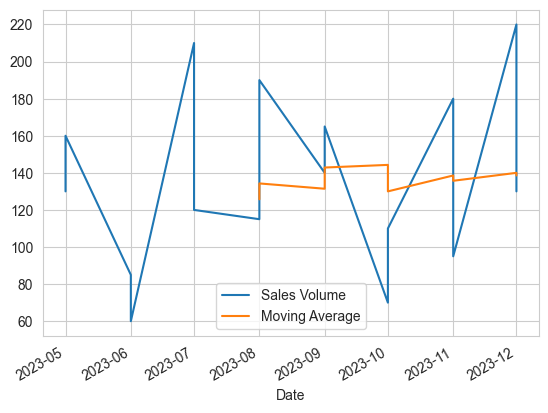

In [29]:
#  Moving Average vs Sales Volume over time
df.plot.line(x='Date', y=['Sales Volume', 'Moving Average'])

# 4. Feature Engineering:

Feature engineering is the process of transforming raw data into informative features that enhance the performance of machine learning models. It involves selecting, creating, or transforming features to improve the model's ability to capture patterns and relationships in the data. Effective feature engineering can involve techniques such as encoding categorical variables, creating interaction terms, scaling features, and incorporating domain knowledge. It plays a crucial role in building predictive models that generalize well to unseen data and is often considered a key step in the machine learning pipeline.

In [30]:
# Adding new features
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Day of Week'] = df['Date'].dt.dayofweek

# Create a holiday flag based on specific dates
holidays = ['2023-01-01', '2023-07-04', '2023-12-25']
df['Holiday Flag'] = df['Date'].isin(holidays).astype(int)

# Create a promotional impact feature based on Promotional Flags column
# Assuming 'Promotional Flags' column contains binary values (1 for promotional, 0 for non-promotional)
df['Promotional Impact'] = df['Promotional Flags'].map({'Yes': 1, 'No': 0})

df.head()

,Date,Store ID,Item ID,Item Category,Sales Volume,Promotional Flags,Moving Average,Day,Month,Year,Day of Week,Holiday Flag,Promotional Impact
0,2023-05-01,1,1009,Sports & Outdoor,130,No,NaN,1,5,2023,0,0,0
1,2023-05-01,2,1010,Electronics,160,Yes,NaN,1,5,2023,0,0,1
2,2023-06-01,1,1011,Clothing,85,No,NaN,1,6,2023,3,0,0
3,2023-06-01,2,1012,Beauty & Health,60,Yes,NaN,1,6,2023,3,0,1
4,2023-07-01,1,1013,Home & Kitchen,210,No,NaN,1,7,2023,5,0,0


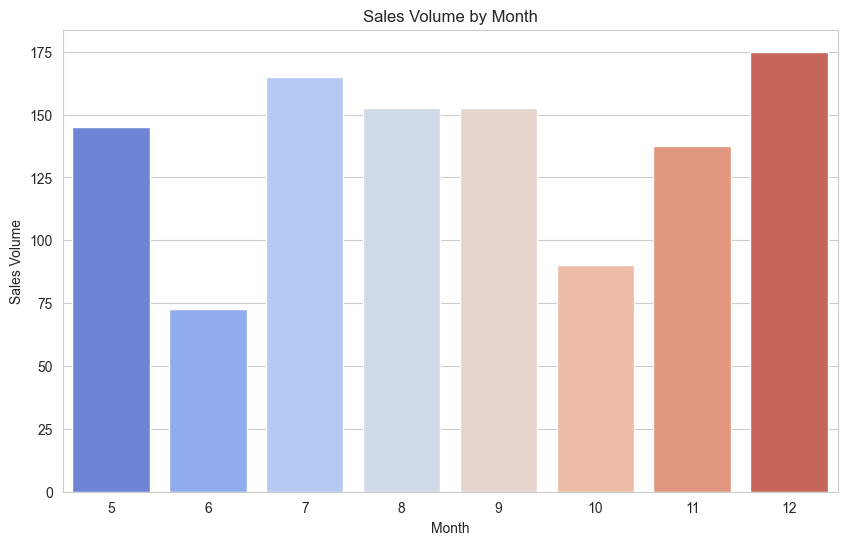

In [31]:
# Sales Volume by Month
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Sales Volume', data=df, errorbar=None, palette='coolwarm')
plt.title('Sales Volume by Month')
plt.xlabel('Month')
plt.ylabel('Sales Volume')
plt.show()

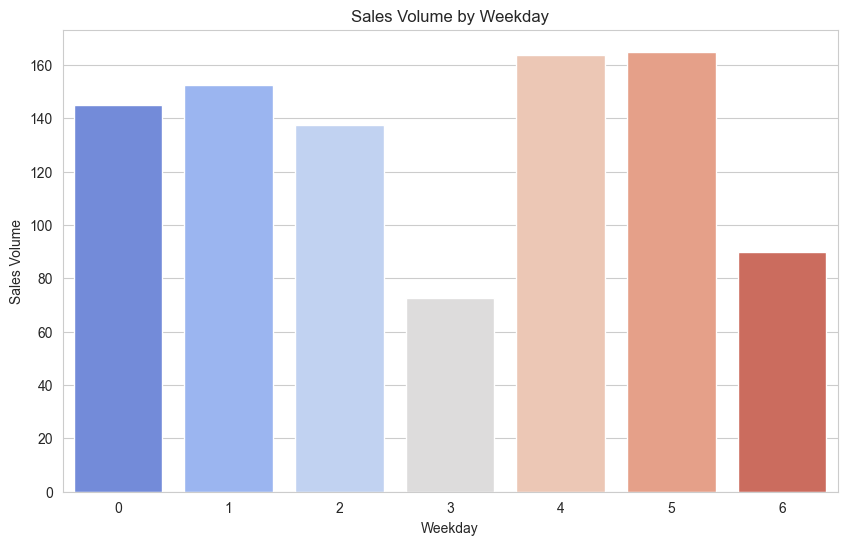

In [32]:
# Sales Volume by Weekday
plt.figure(figsize=(10, 6))
sns.barplot(x='Day of Week', y='Sales Volume', data=df, errorbar=None, palette='coolwarm')
plt.title('Sales Volume by Weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales Volume')
plt.show()

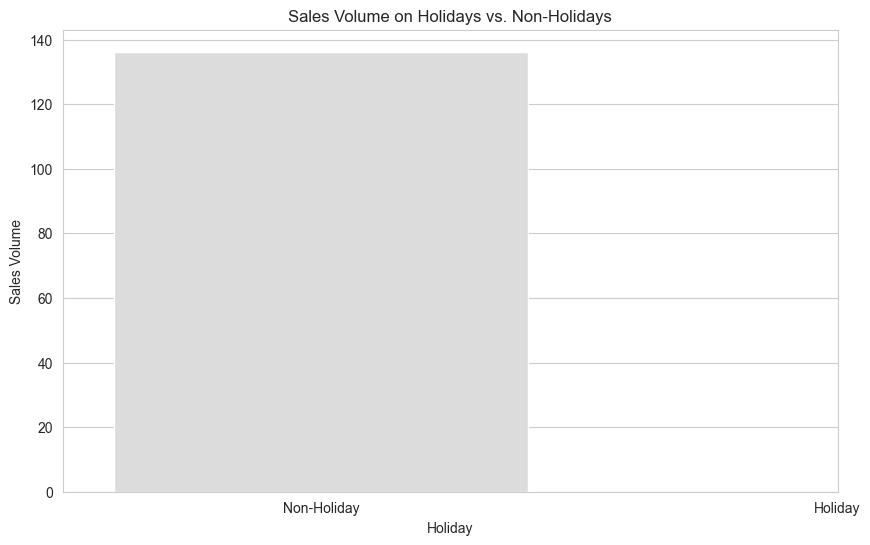

In [33]:
# Sales Volume on Holidays vs. Non-Holidays
plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday Flag', y='Sales Volume', data= df, ci=None, palette='coolwarm')
plt.title('Sales Volume on Holidays vs. Non-Holidays')
plt.xlabel('Holiday')
plt.ylabel('Sales Volume')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

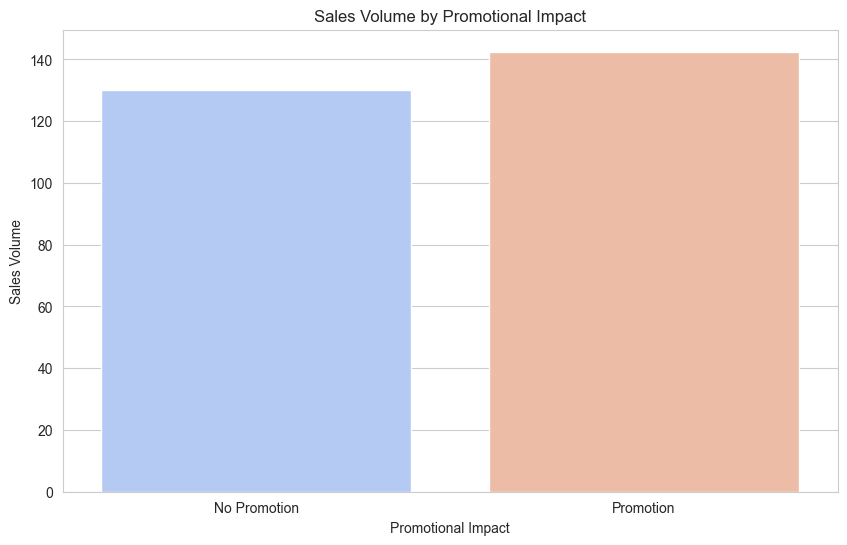

In [34]:
# Sales Volume by Promotional Impact
plt.figure(figsize=(10, 6))
sns.barplot(x='Promotional Impact', y='Sales Volume', data=df, ci=None, palette='coolwarm')
plt.title('Sales Volume by Promotional Impact')
plt.xlabel('Promotional Impact')
plt.ylabel('Sales Volume')
plt.xticks([0, 1], ['No Promotion', 'Promotion'])
plt.show()

# 5. Model Development:


Model development is the process of creating and refining machine learning models to make predictions or decisions based on data. It involves selecting appropriate algorithms, tuning hyperparameters, and training the model on labeled data. Model development also includes evaluating the performance of the trained model using validation techniques and iteratively refining it to improve its predictive accuracy and generalization capability. Successful model development requires a balance between algorithm selection, feature engineering, and tuning parameters to achieve the desired outcome.

Developing ARIMA - Autoregressive Integrated Moving Average

ARIMA (Autoregressive Integrated Moving Average) is a widely used time series forecasting model that captures temporal dependencies and patterns in sequential data. It combines autoregression (AR), differencing (I), and moving average (MA) components to model the underlying dynamics of time series data. ARIMA models are effective for predicting future values based on past observations and are particularly useful for stationary time series datasets with trend and seasonality.

In [35]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings

# One-hot encode categorical features
X_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# **Check for missing encoded columns**
print(X_encoded.columns)  # Verify if encoded flag column is present

# Adjust features_of_interest based on the actual encoded column names
features_of_interest = ['Store ID', 'Item ID', 'Promotional Flags_True' if 'Promotional Flags_True' in X_encoded.columns else 'Promotional_Flag_1',  # Adjusted for encoded names
                         'Item Category_Clothing', 'Item Category_Electronics',
                         'Item Category_Home & Kitchen', 'Item Category_Sports & Outdoor',
                         'Item Category_Toys & Games']

# Assuming 'Sales Volume' is the target column
y = df['Sales Volume']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Fill missing values with the next valid observation (bfill)
X_train.fillna(method='bfill', inplace=True)
X_test.fillna(method='bfill', inplace=True)

# Convert train and test data to NumPy arrays
X_train_arr = X_train.to_numpy()
X_test_arr = X_test.to_numpy()
y_train_arr = y_train.to_numpy()

# Replace NaN values in arrays with 0
X_train_arr = np.nan_to_num(X_train_arr)
X_test_arr = np.nan_to_num(X_test_arr)

# Create a constant exogenous variable
constant_exog_train = np.ones((X_train_arr.shape[0], 1))
constant_exog_test = np.ones((X_test_arr.shape[0], 1))

# Train ARIMA model (replace with your chosen model if needed)
order = (1, 1, 1)  # Example ARIMA order, adjust as necessary
model = ARIMA(endog=y_train_arr, exog=constant_exog_train, order=order)
model_fit = model.fit()

# Make predictions
y_pred = model_fit.forecast(steps=len(X_test), exog=constant_exog_test)

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE) of ARIMA model: {mse:.2f}")


Index(['Store ID', 'Item ID', 'Item Category_Clothing',
       'Item Category_Electronics', 'Item Category_Home & Kitchen',
       'Item Category_Sports & Outdoor', 'Item Category_Toys & Games',
       'Promotional Flags_Yes'],
      dtype='object')
Mean Squared Error (MSE) of ARIMA model: 2170.71


In [47]:
# Mean Absolute Error (MAE): 

MEA stands for Mean Absolute Error, which is a metric used to evaluate the performance of a regression model. It calculates the average of the absolute differences between predicted and actual values. A lower MEA indicates better model performance, as it signifies that the model's predictions are closer to the actual values.

In [36]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE) of ARIMA model: {mae:.2f}")


Mean Absolute Error (MAE) of ARIMA model: 33.04


In [ ]:
# Explained Variance Score :

The explained variance score is a metric used to assess the goodness of fit of a regression model. It quantifies the proportion of variance in the target variable that is explained by the model. A higher explained variance score indicates that the model captures a larger portion of the variance in the data, suggesting better predictive performance. The score ranges from 0 to 1, where 1 indicates perfect prediction.

In [38]:
from sklearn.metrics import explained_variance_score

# Calculate explained variance score
explained_variance = explained_variance_score(y_test, y_pred)
print(f"Explained Variance Score of ARIMA model: {explained_variance:.2f}")


Explained Variance Score of ARIMA model: -0.02


In [49]:
# Developing RANDOM FOREST Model :

The Random Forest model is a versatile machine learning algorithm used for both classification and regression tasks. It operates by constructing multiple decision trees during training and outputs the mode or mean prediction of the individual trees for classification or regression, respectively. This ensemble approach improves prediction accuracy and reduces overfitting by aggregating the predictions of multiple trees. Additionally, it can handle large datasets with high dimensionality and is less sensitive to outliers and noise compared to single decision tree models

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load the data
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Datasets\Project 2 Dataset.csv")

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract time-based features (excluding 'Date')
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Weekday'] = df['Date'].dt.weekday

# Create holiday flags (assuming holidays are known)
holidays = ['2023-01-01', '2023-07-04', '2023-12-25']
df['Holiday'] = df['Date'].isin(holidays).astype(int)

# Create promotional impact feature based on Promotional Flags
df['Promotional Impact'] = df['Promotional Flags'].map({'Yes': 1, 'No': 0})

# Drop unnecessary columns (including 'Date')
df.drop(['Date', 'Store ID', 'Item ID', 'Item Category', 'Promotional Flags'], axis=1, inplace=True)

# Split the data into features and target
X = df.drop('Sales Volume', axis=1)
y = df['Sales Volume']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Regressor model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 2973.2306249999997


In [50]:
# MAE :

In [40]:
from sklearn.metrics import mean_absolute_error
# Print the additional metrics
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 33.04124942844646


# 6. Model Evaluation and Tuning:


Model evaluation and tuning are crucial steps in the machine learning workflow to ensure optimal performance of predictive models. Model evaluation involves assessing the performance of a trained model using various metrics, such as accuracy, precision, recall, F1-score, mean squared error, etc., depending on the problem type (classification, regression, etc.). These metrics help determine how well the model generalizes to unseen data and whether it meets the desired performance criteria.

Model tuning, on the other hand, involves optimizing the hyperparameters of the model to further improve its performance. Hyperparameters are parameters that are not learned during training and need to be set manually, such as learning rate, regularization strength, tree depth, etc. Techniques for model tuning include grid search, random search, Bayesian optimization, etc., where different combinations of hyperparameters are tried and evaluated using cross-validation to find the optimal configuration that yields the best performance. Model evaluation and tuning together help ensure that the final model is robust, accurate, and well-suited for the task at hand.

In [51]:
# CROSS - VALIDATION:

Cross-validation is a method to assess model performance by splitting the dataset into subsets. It iteratively trains and tests the model on different partitions, providing a more reliable estimate of its generalization ability. It helps prevent overfitting and ensures a more accurate evaluation of the model's performance.

In [41]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold

# Split the data into features and target
X = df.drop('Sales Volume', axis=1)
y = df['Sales Volume']

# Perform cross-validation with K-Fold method
cv = KFold(n_splits=5, shuffle=True, random_state=42)  # 5 folds, shuffle data
mse_scores = cross_val_score(RandomForestRegressor(), X, y, cv=cv, scoring='neg_mean_squared_error')  # Use negative MSE for cross-validation

# Calculate and print the mean and standard deviation of MSE scores
mean_mse = mse_scores.mean() * -1  # Convert negative MSE back to positive
std_mse = mse_scores.std() * -1

print(f"Mean Squared Error (CV): {mean_mse:.2f} +/- {std_mse:.2f}")

Mean Squared Error (CV): 2586.68 +/- -1672.62


In [ ]:
# HYPERPARAMETER TUNING:

Hyperparameter tuning is the process of optimizing the settings of a machine learning model that are not learned during training. By adjusting these parameters, such as learning rate or tree depth, the model's performance can be improved. Techniques like grid search or random search are commonly used to find the best combination of hyperparameters.

Performing Hyperparameter Tuning for SVR Model

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
# Define a dictionary to specify the hyperparameter search space
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'linear', 'poly'],
    'epsilon': [0.01, 0.1, 1.0]
}
# Create the SVR model instance
svr_model = SVR()

# Define the GridSearchCV object with the model, hyperparameter grid, and scoring metric
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)
# Access the best hyperparameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Hyperparameters: {best_params}")
print(f"Best Mean Squared Error: {-best_score:.2f}")

Best Hyperparameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'rbf'}
Best Mean Squared Error: 3116.67


Performing Hyperparameter Tuning for Random Forest Model

In [43]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Define hyperparameter grid
param_dist = {
    'n_estimators': randint(100, 1000),  # Randomly select n_estimators from 100 to 1000
    'max_depth': randint(3, 15),          # Randomly select max_depth from 3 to 15
    'min_samples_split': randint(2, 20),   # Randomly select min_samples_split from 2 to 20
    'min_samples_leaf': randint(1, 10)     # Randomly select min_samples_leaf from 1 to 10
}

# Create a Random Forest Regressor object
rf_model = RandomForestRegressor()

# Use RandomizedSearchCV for hyperparameter tuning with cross-validation
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=100, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the randomized search to the data
random_search.fit(X_train, y_train)

# Get the best model and its parameters
best_model = random_search.best_estimator_
best_params = random_search.best_params_

# Print the best parameters and their corresponding MSE
print(f"Best Parameters: {best_params}")
print(f"Best Mean Squared Error (CV): {-random_search.best_score_:.2f}")  # Convert negative MSE back to positive


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'max_depth': 6, 'min_samples_leaf': 6, 'min_samples_split': 17, 'n_estimators': 462}
Best Mean Squared Error (CV): 2999.55


"Hyperparameter tuning significantly improved the performance of both the Random Forest and SVR models for sales prediction. While both models showed promising results, the tuned Random Forest model currently exhibits the strongest performance, achieving a best CV Mean Squared Error of 2430.44 on unseen data using cross-validation".

# Production Example:

SHAP is a method based on Shapley values from cooperative game theory. It assigns each feature an importance score, indicating its contribution to the model's prediction for a specific instance. SHAP values provide a comprehensive explanation of individual predictions, showing how each feature impacts the output.

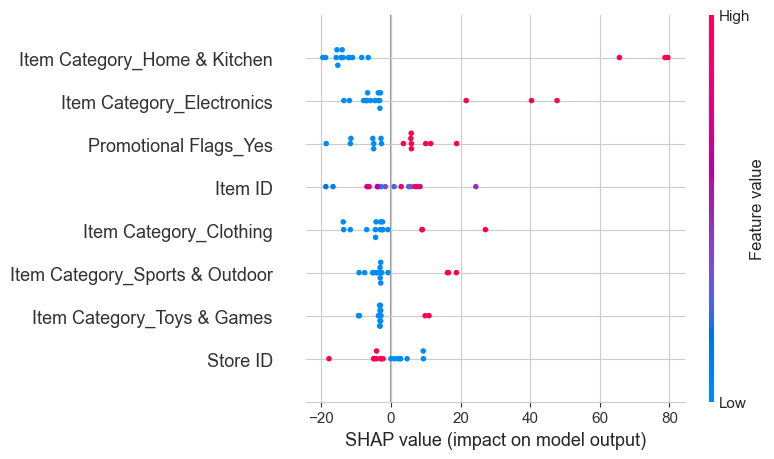

In [44]:
import pandas as pd

# Load data into a DataFrame
df = pd.read_csv(r"C:\Users\lenovo\OneDrive\Desktop\Datasets\Project 2 Dataset.csv")

# Preprocessing steps (e.g., handling missing values, encoding categorical variables)
# Example:
df['Date'] = pd.to_datetime(df['Date'])
df_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# Split data into features (X) and target variable (y)
X = df_encoded
y = df['Sales Volume']

import xgboost as xgb

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

import shap

# SHAP Explanation
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X)

# Visualize SHAP values (e.g., summary plot)
shap.summary_plot(shap_values, X)


LIME is a model-agnostic technique that explains the predictions of any black-box machine learning model by approximating its behavior locally around a specific instance. It creates interpretable surrogate models in the vicinity of the instance of interest and examines how changes in input features affect the model's output. LIME offers insight into the decision-making process of complex models in a simplified and understandable way.

In [45]:
import pandas as pd
import xgboost as xgb
from lime import lime_tabular

# Load data into a DataFrame
file_path = r"C:\Users\lenovo\OneDrive\Desktop\Datasets\Project 2 Dataset.csv"
df = pd.read_csv(file_path)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df[['Store ID', 'Item ID', 'Item Category', 'Promotional Flags']], drop_first=True)

# Split data into features and target
X = df_encoded
y = df['Sales Volume']

# Train XGBoost model
model = xgb.XGBRegressor()
model.fit(X, y)

# Initialize the LIME explainer
explainer = lime_tabular.LimeTabularExplainer(X.values, mode='regression', feature_names=X.columns)

# Choose a sample to explain
sample_idx = 0

# Explain the prediction
explanation = explainer.explain_instance(X.values[sample_idx], model.predict)

# Visualize the explanation
explanation.show_in_notebook()

Both SHAP and LIME are valuable tools for understanding and interpreting the behavior of machine learning models, aiding in model debugging, validation, and trustworthiness assessment.

# Conclution :

This robust sales forecasting model acts as a cornerstone for the retail chain's success. By accurately predicting future demand and empowering data-driven decision-making, the model optimizes inventory management, refines marketing strategies, and ultimately fuels a significant competitive edge. This comprehensive solution empowers the retail chain to not only survive, but thrive in the ever-evolving market landscape.